# Task 3: <font color="#338CFF">Car Price Prediction With Machine Learning</font>

---

## Contribution: <font color="#b30000">Rajesh Patil (Individual)</font>

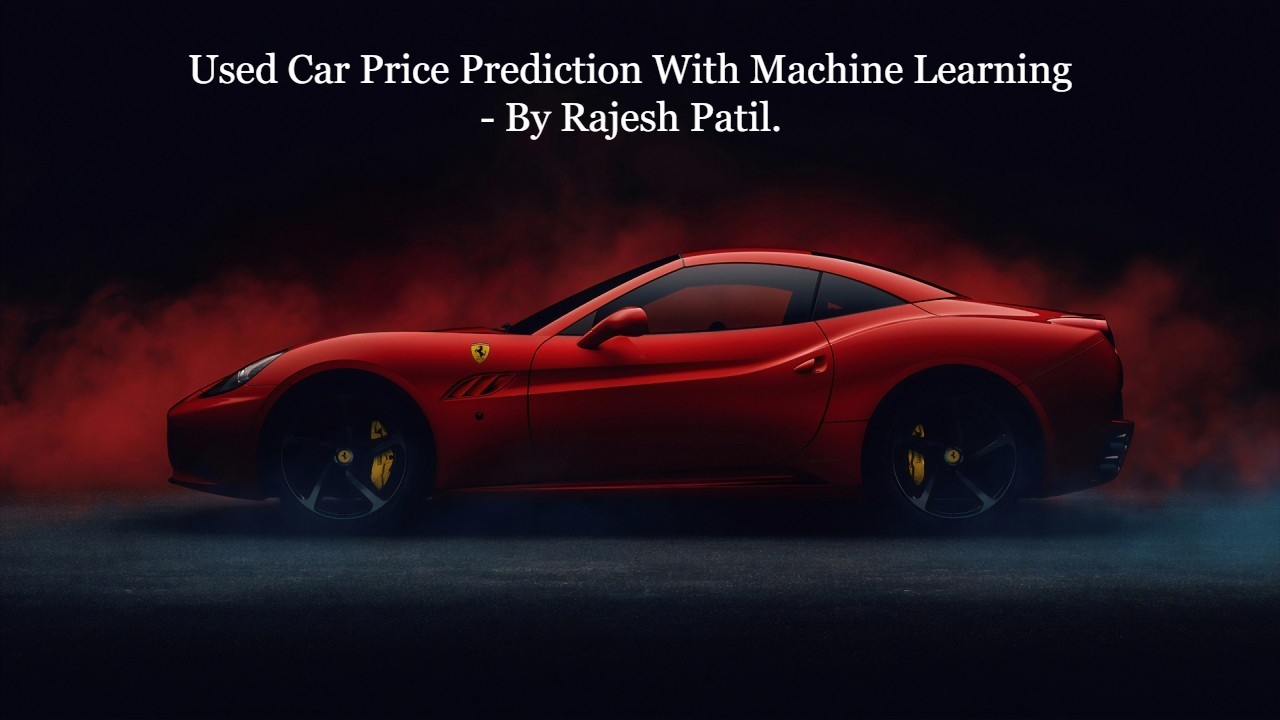

## <font color="#b30000">1. Import required libraries</font>

In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## <font color="#b30000">2. Load the dataset</font>

In [2]:
## Loading the dataset.
df = pd.read_csv("car+data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## <font color="#b30000">3. Check the shape and basic information of the dataset.</font>

In [3]:
## Checking the shape of dataset
df.shape

(301, 9)

In [4]:
## Checking the basic basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


- We have around 300 instances and 9 features.
- There are 4 categorical features and 5 numerical features.
- Also, We can observe that there are no missing values present in the dataset.

## <font color="#b30000">4. Check for the presence of the duplicate records in the dataset?</font>

In [5]:
## Checking the presence of duplicate records and dropping them.
check_duplicate = len(df[df.duplicated()])
if check_duplicate > 0:
   
    df = df.drop_duplicates()

    print(f"\033[1m{check_duplicate} duplicate record(s) found and dropped.\033[0m")
else:
    print("\033[1mNo duplicate records found.\033[0m")

2 duplicate record(s) found and dropped.


## <font color="#b30000">5. Drop the columns which you think redundant for the analysis.</font>

In [6]:
## Dropping the redundant columns.
df.drop('Car_Name', axis=1, inplace=True)

In [7]:
## Checking the dataset.
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## <font color="#b30000">6. Extract a new feature called 'age_of_the_car' from the feature 'year' and drop the feature year</font>

In [8]:
## Subtracting the year of purchase with the current year and extracting the age of the car.
current_year = pd.to_datetime('today').year
df['age_of_the_car'] = current_year - df['Year']
df['age_of_the_car']

0       9
1      10
2       6
3      12
4       9
       ..
296     7
297     8
298    14
299     6
300     7
Name: age_of_the_car, Length: 299, dtype: int64

In [9]:
## Droping the column year.
df.drop('Year', axis=1, inplace=True)

In [10]:
## Checking the dataset.
df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_the_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10


 ## <font color="#b30000">7. Encode the categorical columns</font>

In [11]:
## Checking the categorical columnswhich are present.
df.select_dtypes('object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [12]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [13]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [14]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [15]:
## Manual Encoding :
df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol':0, 'Diesel':1, 'CNG':2})

df['Seller_Type'] = df['Seller_Type'].replace({'Dealer':0, 'Individual':1})

df['Transmission'] = df['Transmission'].replace({'Manual':0, 'Automatic':1})

In [16]:
df['Fuel_Type'].unique()

array([0, 1, 2], dtype=int64)

In [17]:
df['Seller_Type'].unique()

array([0, 1], dtype=int64)

In [18]:
df['Transmission'].unique()

array([0, 1], dtype=int64)

In [19]:
## Final dataframe
df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_the_car
0,3.35,5.59,27000,0,0,0,0,9
1,4.75,9.54,43000,1,0,0,0,10


 ## <font color="#b30000">8. Separate the target and independent features.</font>

In [20]:
## Lets store the target column in the y variable and the rest of the columns in the X variable.
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

## <font color="#b30000">9. Split the data into train and test.</font>

In [21]:
## train_test_split() is used to divide dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(209, 7) (90, 7)
(209,) (90,)


## <font color="#b30000">10. Build a Random forest Regressor model and check the r2-score for train and test.</font>

In [22]:
## Creating an instance of the Random Forest Regressor:
rf = RandomForestRegressor()

## Let us fit the model to the training data:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
## Make predictions on the training set:
y_train_pred = rf.predict(X_train)

## Make predictions on the test set:
y_test_pred = rf.predict(X_test)

## Let us check the r2-score to see how our model is performing

## Calculate the R2 score for the training set:
r2_train = r2_score(y_train, y_train_pred)

## Calculate the R2 score for the test set:
r2_test = r2_score(y_test, y_test_pred)

print('\033[1mr2-score train: \033[0m', r2_train)
print('\033[1mr2-score test: \033[0m', r2_test)

r2-score train:  0.9747570596111759
r2-score test:  0.9004737992868099


## <font color="#b30000">11. Create a pickle file with an extension as .pkl</font>

In [24]:
import pickle

## Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))